In [1]:
from k_means import KMeans
kmeans = KMeans(4, max_iter=100)
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=10)
kmeans.fit(X)

0


[array([[-3.11697829, -0.37035028],
       [ 9.26347472,  6.53421179],
       [ 6.32127652, -1.96506903],
       [ 2.09194489,  1.11667599]])]


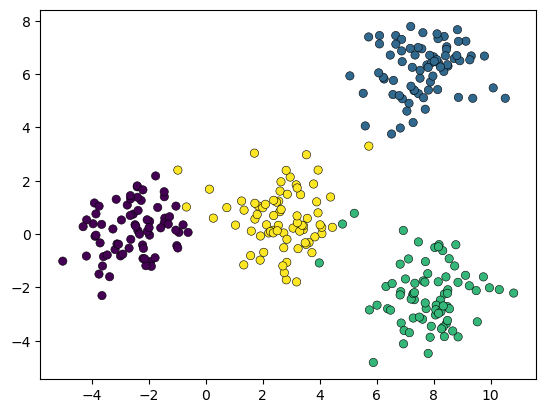

In [2]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans._labels, edgecolors='black', linewidths=0.4)

print(kmeans._centroid_updates)

In [50]:
distances = np.zeros((len(X), 2))
centers = np.random.multivariate_normal([0, 0], np.eye(2), size=2)
distances = np.linalg.norm(X[:, np.newaxis] - centers[], axis=2)
distances

array([[ 9.2027475 ,  9.16771829],
       [ 6.17166617,  6.46467309],
       [ 9.05964414,  9.09488448],
       [ 8.5377128 ,  8.57782513],
       [ 6.58289316,  6.84817152],
       [ 6.29860533,  6.67045819],
       [ 6.46765265,  6.753188  ],
       [ 6.94015252,  7.22885986],
       [ 5.60291494,  5.93615689],
       [ 7.65951829,  7.96086617],
       [ 9.05637622,  9.10265323],
       [ 8.39496271,  8.34772554],
       [ 8.64006354,  8.66067883],
       [ 9.04201435,  9.1116616 ],
       [ 7.57940856,  7.9144623 ],
       [ 8.94363336,  8.95521027],
       [ 8.6871946 ,  8.65600587],
       [ 7.60998417,  7.93170291],
       [ 6.6580234 ,  6.95640344],
       [ 9.56078391,  9.5447349 ],
       [ 9.00139773,  8.97612549],
       [ 8.12015234,  8.12277065],
       [ 6.340984  ,  6.67076909],
       [ 7.37236753,  7.68407028],
       [ 9.17149305,  9.19155578],
       [ 8.39973736,  8.41577719],
       [ 8.89120658,  8.89620829],
       [ 6.97475195,  7.25649779],
       [ 8.64178107,

In [49]:
np.linalg.norm(X[1] - centers[1])

5.8728985670890435

In [72]:
n_clusters = 5
init_mus = np.zeros(shape=(n_clusters, X.shape[1]))

for center in range(n_clusters):
    
    if center == 0:
        center_idx = np.random.choice(len(X))
        init_mus[center] = X[center_idx]
        
    else:
        # compute distance from each point to its nearest center
        distances = np.linalg.norm(X[:, np.newaxis] - init_mus[:center], axis=2)
        dist_to_closest_center = distances.min(1)
        dist_to_closest_center **= 2
        probs = dist_to_closest_center / dist_to_closest_center.sum()
        center_idx = np.random.choice(len(X), p=probs)